# 📦 Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.abspath("../"))
from dotenv import load_dotenv
from helpers.settings import apply_settings
from helpers.eda import perform_eda
from helpers.preprocess_data import prepare_data_for_analysis
from helpers.analyse_results import run_full_comparison
from helpers.visualise_results import run_all_visualizations
from helpers.diagnose_distributions import diagnose_relevant_variables
apply_settings()

# 📂 Loading and Preparing the Data

In [2]:
load_dotenv()
file_path = os.getenv('FILE_PATH')
df_prepared, df_summary = prepare_data_for_analysis(file_path)

# Overview

In [3]:
display(df_summary[['ab_group', 'users', 'conversion_rate', 'cvr_uplift']])

,ab_group,users,conversion_rate,cvr_uplift
0,1,41498,0.148369,0.000000
1,2,41798,0.146060,-1.556243


# 📝 A rough checklist for EDA/"anomaly detection":

1. Check for outliers in the ```amount``` and ```cost``` columns (Z-scores > 3) ✔️ 
   
2. Ensure that ```payment_time``` is not earlier than ```install_time```.✔️ 

   No such rows are present in the dataset

3. Investigate missing values in critical columns such as ```install_time```, ```payment_time``` etc.✔️ 

   While the data for ```payment_time``` (and, consequently, ```amount_per_payer``` and ```net_revenue_per_payer```) is heavily imbalanced (a lot of values are missing), this makes sense as conversion to a paying customer is inherently a low-probability event. The data seems to be missing at random, the missingness is not endogenously predicted by another variable/factor. No missing values are present in any other field.

4. Look for any unexpected values in the ```ab_group``` column (should only contain 1 or 2).✔️ 

   No such values are present in the dataset ✔️ 

5. Investigate any rows with invalid or missing datetime values.✔️ 

   No such values are present in the dataset

## 🔥 Performing Full EDA

## 🔎 Basic Data Overview

## Missing Values

user_id                      0
ab_group                     0
install_time                 0
payment_time             71034
amount_per_payer         71034
cost                         0
converted                    0
amount_per_user              0
net_revenue_per_user         0
net_revenue_per_payer    71034
dtype: int64

## Data Types

user_id                           int64
ab_group                          int64
install_time             datetime64[ns]
payment_time             datetime64[ns]
amount_per_payer                float64
cost                            float64
converted                         int64
amount_per_user                 float64
net_revenue_per_user            float64
net_revenue_per_payer           float64
dtype: object

## Summary Statistics by AB Group

converted              amount_per_user                      \
              mean   sum  count            mean          std median   
ab_group                                                              
1         0.148369  6157  41498      267.635621  1639.028050    0.0   
2         0.146060  6105  41798      202.839011  1273.396392    0.0   

         amount_per_payer                     net_revenue_per_user  \
                     mean          std median                 mean   
ab_group                                                             
1             1803.856261  3916.283727  499.0          -432.165549   
2             1388.741196  3075.104191  499.0          -496.871930   

                                  net_revenue_per_payer               \
                  std      median                  mean          std   
ab_group                                                               
1         1639.344259 -693.676553           1104.535636  3916.439900   
2         1273.768586 -693.819242            689.138130  3075.448466   

                            cost                         
              median        mean        std      median  
ab_group                                                 
1        -180.705571  699.801170  26.523003  699.456005  
2        -189.429479  699.710942  26.432443  699.330055

## 📊 Checking Numerical Anomalies

#### Outliers detected in `amount_per_user`

,user_id,ab_group,install_time,payment_time,amount_per_payer,cost,converted,amount_per_user,net_revenue_per_user,net_revenue_per_payer
364,300647967424,1,2005-05-20 12:13:58,2005-06-07 00:34:13,4999.0,705.921570,1,4999.0,4293.078430,4293.078430
390,300647967424,1,2005-05-20 12:13:58,2005-06-07 00:35:30,4999.0,660.295366,1,4999.0,4338.704634,4338.704634
633,300647968473,1,2005-05-20 15:21:07,2005-05-23 03:23:53,9999.0,685.303003,1,9999.0,9313.696997,9313.696997
634,300647968473,1,2005-05-20 15:21:07,2005-05-26 00:05:02,4999.0,748.623061,1,4999.0,4250.376939,4250.376939
853,300647969298,2,2005-05-20 17:31:57,2005-05-24 08:00:53,4999.0,702.192266,1,4999.0,4296.807734,4296.807734
...,...,...,...,...,...,...,...,...,...,...
83282,304942768000,1,2005-07-20 02:50:07,2005-08-12 05:31:23,4999.0,730.323811,1,4999.0,4268.676189,4268.676189
83283,304942768000,1,2005-07-20 02:50:07,2005-08-18 00:58:39,4999.0,709.375677,1,4999.0,4289.624323,4289.624323
83284,304942768000,1,2005-07-20 02:50:07,2005-08-18 02:11:15,4999.0,731.889117,1,4999.0,4267.110883,4267.110883
83285,304942768000,1,2005-07-20 02:50:07,2005-08-18 03:10:59,4999.0,711.776858,1,4999.0,4287.223142,4287.223142


#### Outliers detected in `amount_per_payer`

,user_id,ab_group,install_time,payment_time,amount_per_payer,cost,converted,amount_per_user,net_revenue_per_user,net_revenue_per_payer
856,300647969298,2,2005-05-20 17:31:57,2005-05-25 17:08:28,24999.0,714.371721,1,24999.0,24284.628279,24284.628279
860,300647969298,2,2005-05-20 17:31:57,2005-05-29 16:43:37,24999.0,721.613231,1,24999.0,24277.386769,24277.386769
862,300647969298,2,2005-05-20 17:31:57,2005-05-26 16:07:01,24999.0,725.865329,1,24999.0,24273.134671,24273.134671
863,300647969298,2,2005-05-20 17:31:57,2005-06-17 23:24:07,24999.0,737.998532,1,24999.0,24261.001468,24261.001468
874,300647969298,2,2005-05-20 17:31:57,2005-06-14 17:33:05,24999.0,691.848622,1,24999.0,24307.151378,24307.151378
...,...,...,...,...,...,...,...,...,...,...
78496,304942748127,1,2005-07-17 01:18:40,2005-07-25 08:45:47,24999.0,696.315274,1,24999.0,24302.684726,24302.684726
78497,304942748127,1,2005-07-17 01:18:40,2005-07-24 07:43:12,24999.0,662.499663,1,24999.0,24336.500337,24336.500337
78498,304942748127,1,2005-07-17 01:18:40,2005-07-22 20:16:20,24999.0,766.348998,1,24999.0,24232.651002,24232.651002
79652,304942753289,2,2005-07-17 20:46:03,2005-08-09 17:52:55,24999.0,726.168530,1,24999.0,24272.831470,24272.831470


#### Outliers detected in `cost`

,user_id,ab_group,install_time,payment_time,amount_per_payer,cost,converted,amount_per_user,net_revenue_per_user,net_revenue_per_payer
22,300647966034,2,2005-05-20 03:42:10,NaT,NaN,783.919195,0,0.0,-783.919195,NaN
120,300647966501,2,2005-05-20 07:34:47,2005-05-24 17:45:59,499.0,786.763497,1,499.0,-287.763497,-287.763497
268,300647967088,1,2005-05-20 11:02:20,NaT,NaN,615.655412,0,0.0,-615.655412,NaN
413,274878086411,2,2005-05-20 12:29:24,NaT,NaN,779.759717,0,0.0,-779.759717,NaN
636,300647968473,1,2005-05-20 15:21:07,2005-05-23 21:17:58,499.0,789.646896,1,499.0,-290.646896,-290.646896
...,...,...,...,...,...,...,...,...,...,...
79616,304942753120,1,2005-07-17 20:20:53,NaT,NaN,790.339754,0,0.0,-790.339754,NaN
79912,304942754267,2,2005-07-18 00:12:47,NaT,NaN,782.234563,0,0.0,-782.234563,NaN
80153,279172897798,1,2005-07-18 06:10:17,NaT,NaN,783.300003,0,0.0,-783.300003,NaN
81096,304942759281,1,2005-07-18 19:18:16,NaT,NaN,780.554569,0,0.0,-780.554569,NaN


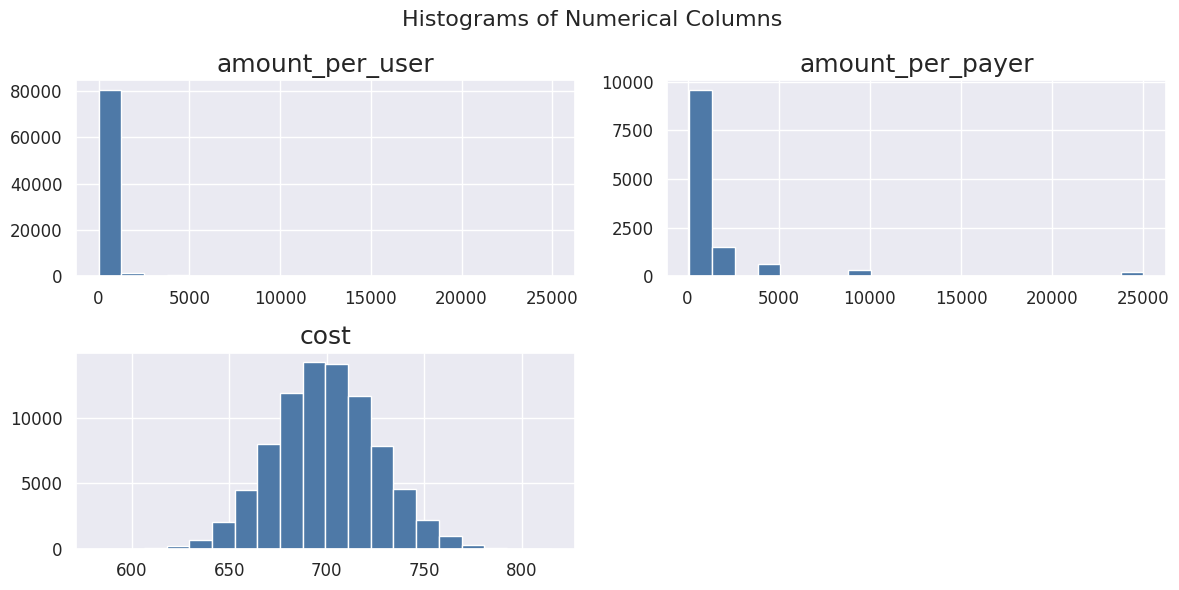

## 🕒 Checking Date/Time Anomalies

## Install Time Range

Min: 2005-05-20 03:00:27, Max: 2005-07-20 02:59:33


## ✅ No Payments Before Install Detected

## 🧹 Checking Missing Data in Critical Columns

payment_time        71034
amount_per_payer    71034
install_time            0
cost                    0
dtype: int64

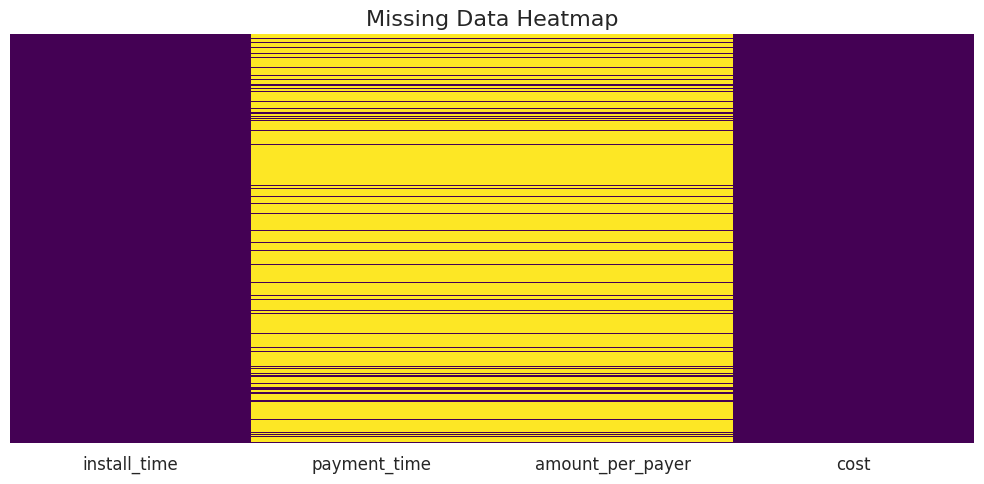

## 🧪 Checking AB Group Anomalies

ab_group
2    41798
1    41498
Name: count, dtype: int64

## ✅ No Unexpected Groups Detected

In [4]:
perform_eda(file_path)

# 📊 Visualizations

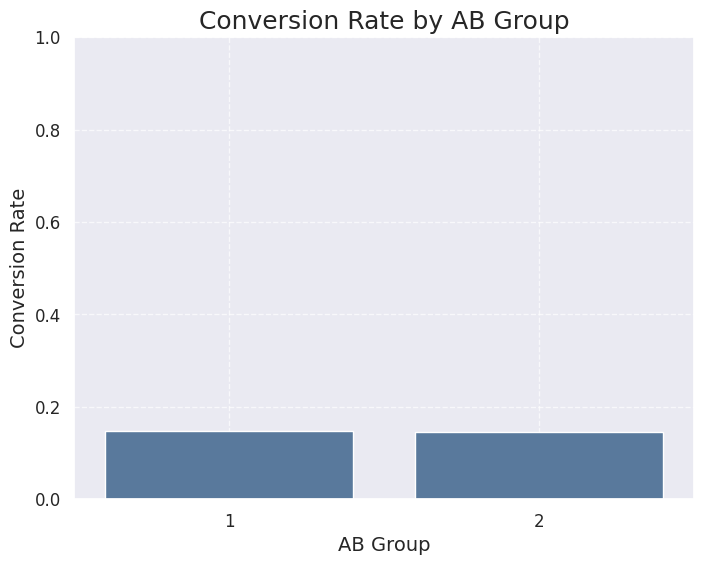

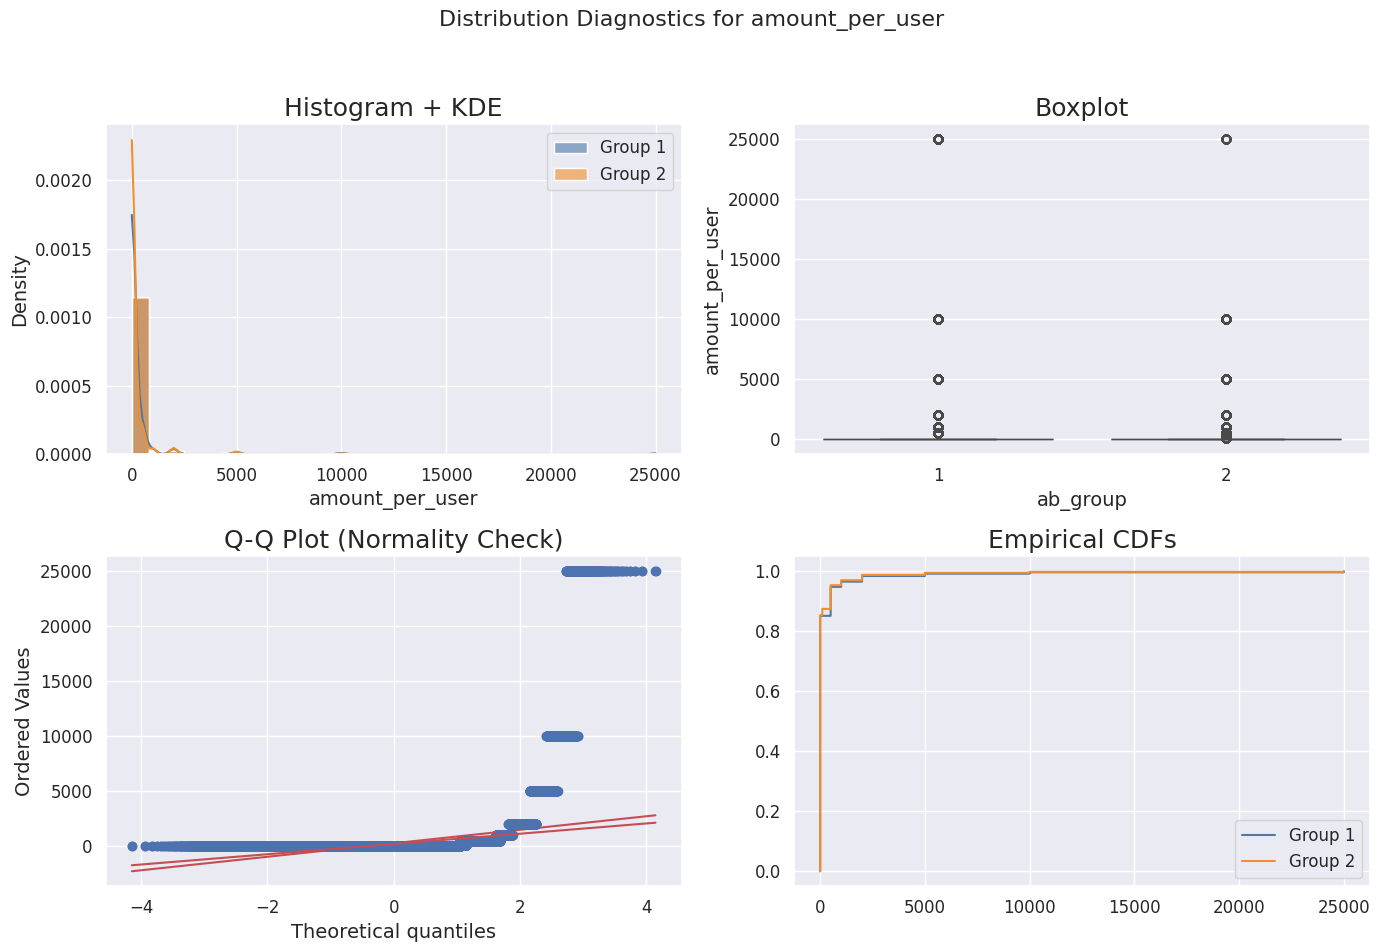

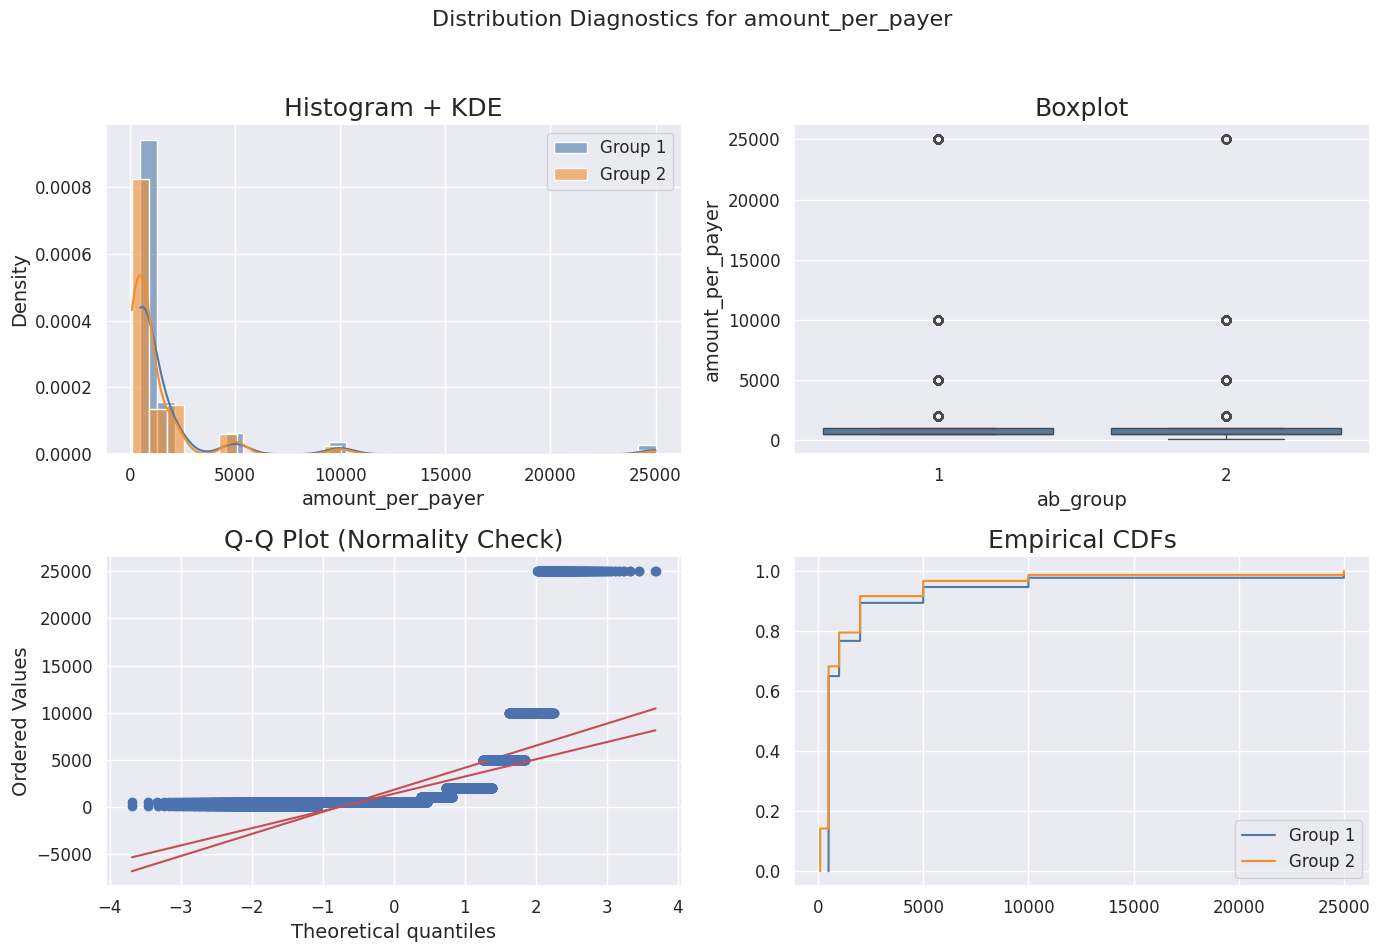

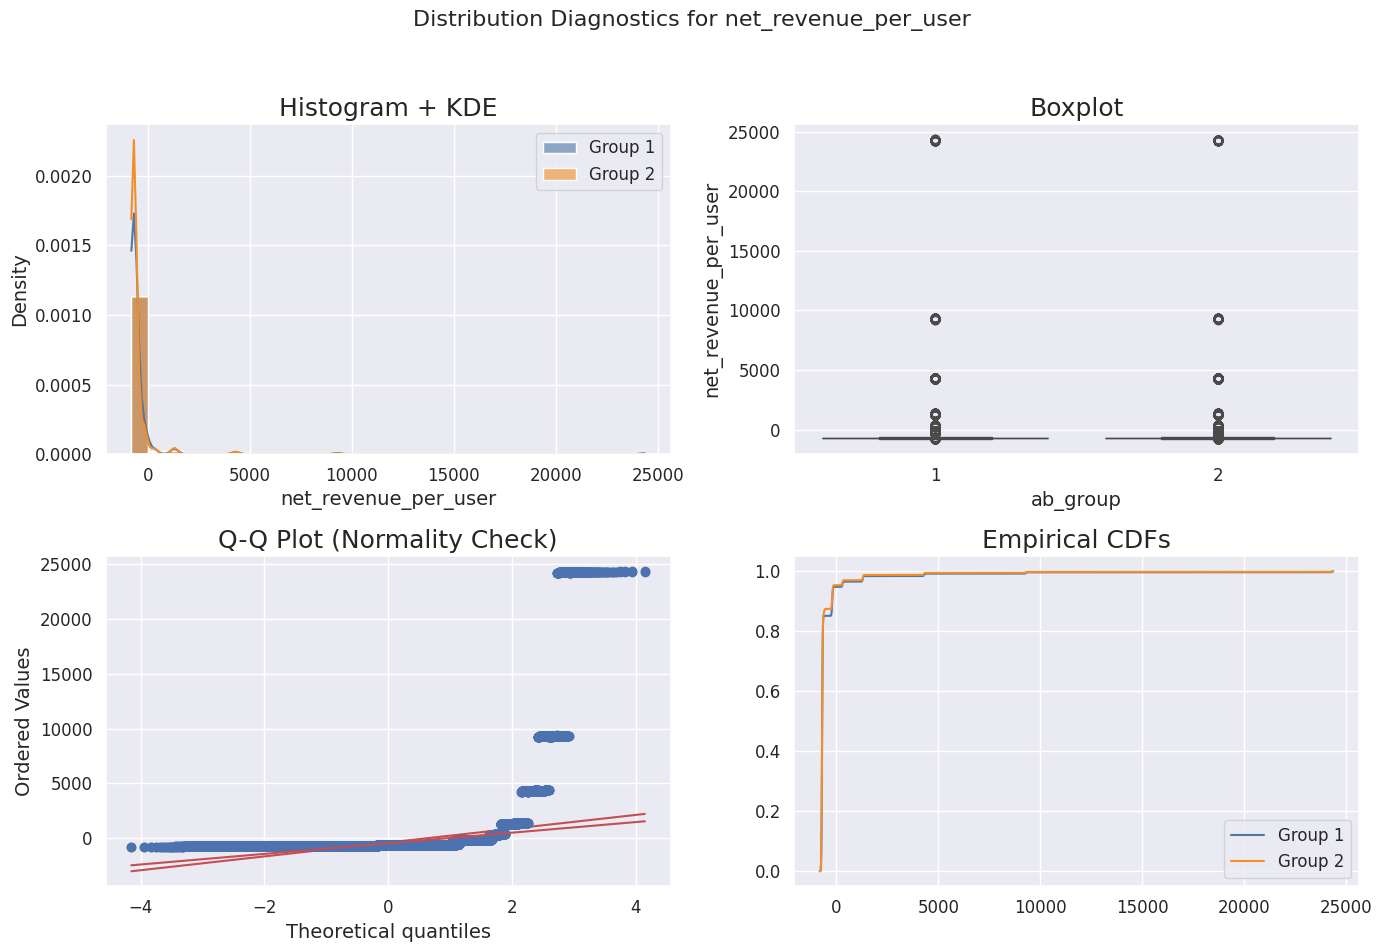

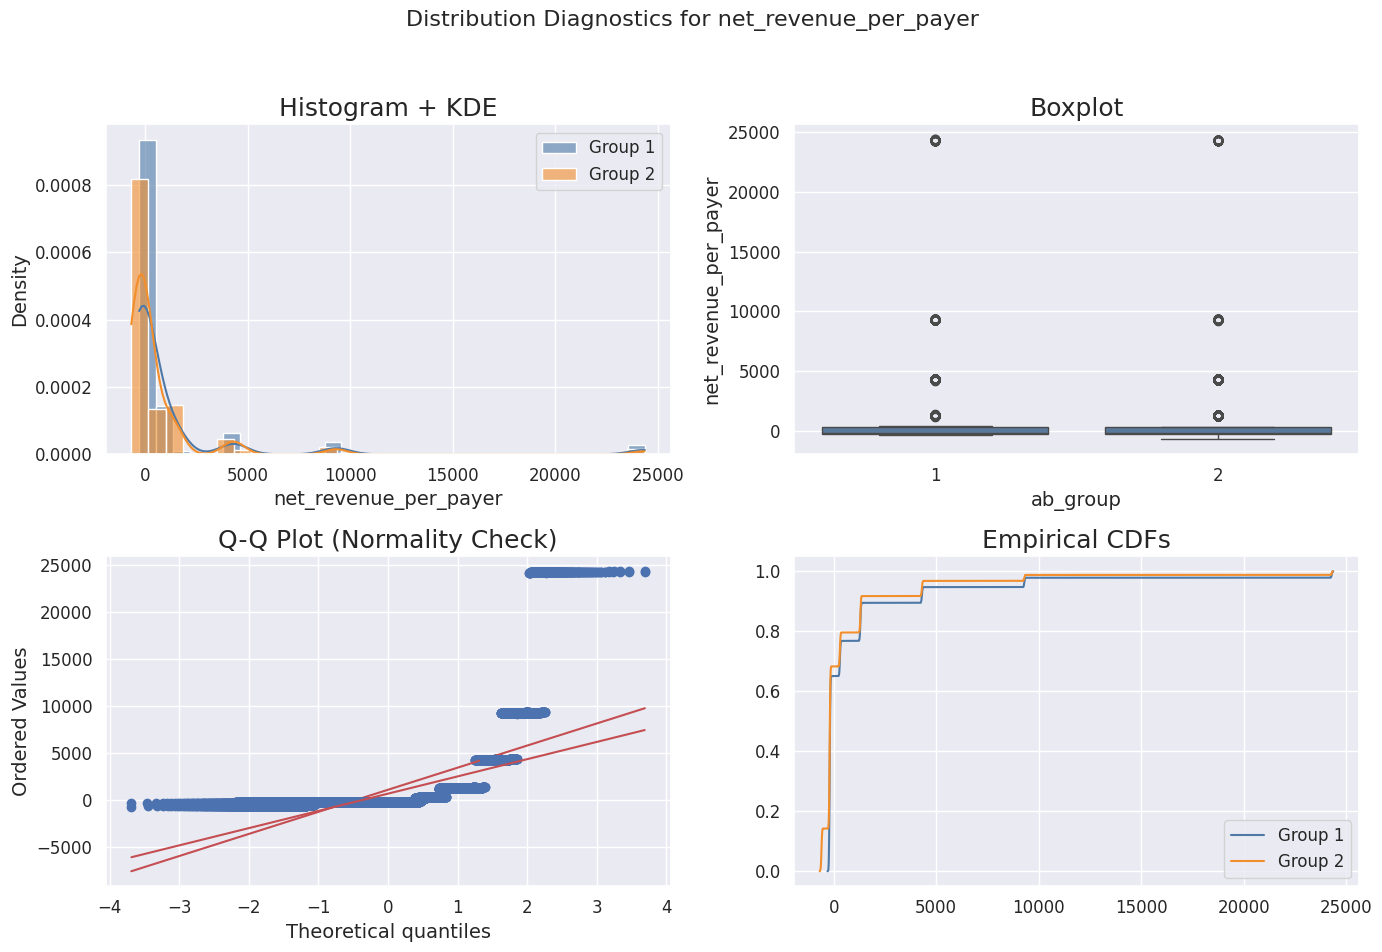

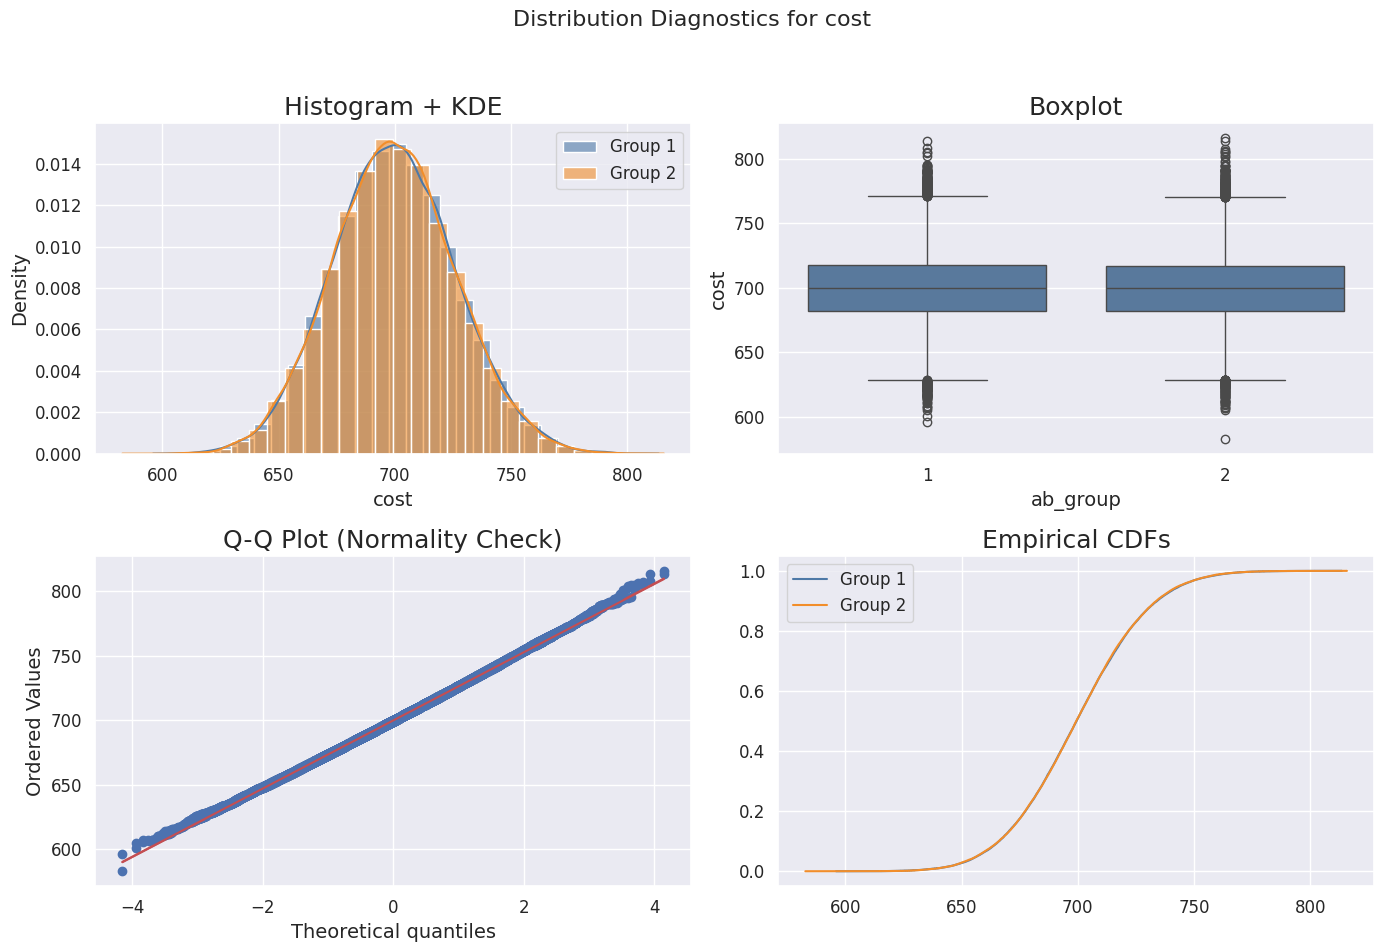

In [5]:
run_all_visualizations(df_prepared)

# 🧪 Statistical Testing

In [6]:
run_full_comparison(df_prepared)

## 📊 Binary Metric: Conversion Rate Comparison

,Test,p-value
0,Fisher's Exact Test p-value,0.34785
1,Chi-Squared Test p-value,0.35205


## 📈 Continuous Metrics Comparison

### ➡️ Metric: `amount_per_user`

,Test,p-value
0,Z-test p-value,0.00000
1,Student's t-test p-value,0.00000
2,Welch's t-test p-value,0.00000
3,Mann-Whitney U test p-value,0.03687


### ➡️ Metric: `amount_per_payer`

,Test,p-value
0,Z-test p-value,0.00000
1,Student's t-test p-value,0.00000
2,Welch's t-test p-value,0.00000
3,Mann-Whitney U test p-value,0.00000


### ➡️ Metric: `net_revenue_per_user`

,Test,p-value
0,Z-test p-value,0.00000
1,Student's t-test p-value,0.00000
2,Welch's t-test p-value,0.00000
3,Mann-Whitney U test p-value,0.32705


### ➡️ Metric: `net_revenue_per_payer`

,Test,p-value
0,Z-test p-value,0.00000
1,Student's t-test p-value,0.00000
2,Welch's t-test p-value,0.00000
3,Mann-Whitney U test p-value,0.00000


# Checking statistical assumptions

## 🔍 Diagnostics for `amount_per_user`

,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,1,41498,267.64,0.00,1639.03,12.10,168.16


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,2,41798,202.84,0.00,1273.40,14.51,256.54


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


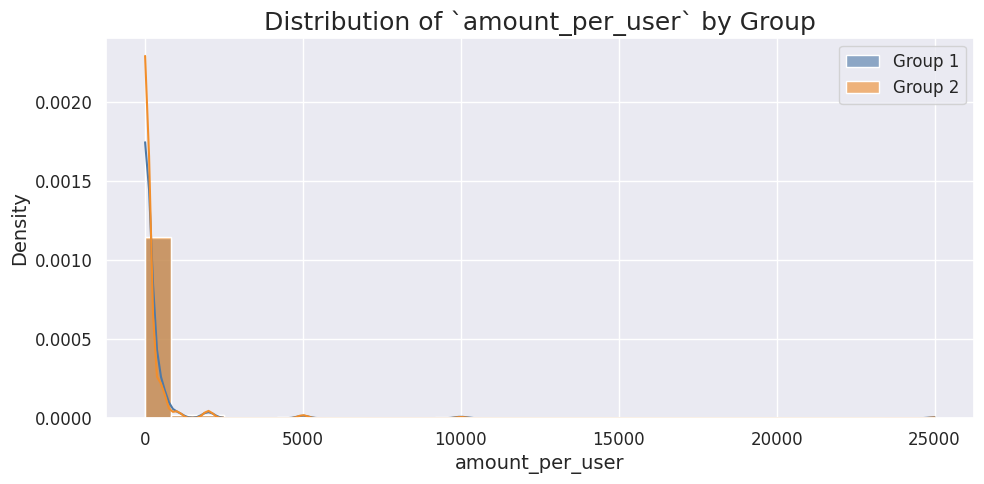

## 🔍 Diagnostics for `amount_per_payer`

,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,1,6157,1803.86,499.00,3916.28,4.74,24.01


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,2,6105,1388.74,499.00,3075.10,5.84,39.34


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


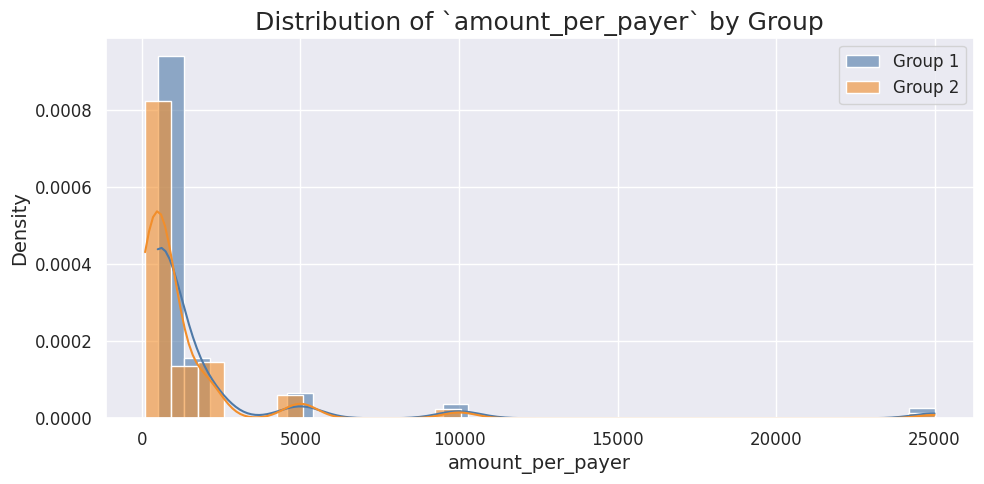

## 🔍 Diagnostics for `net_revenue_per_user`

,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,1,41498,-432.17,-693.68,1639.34,12.09,168.03


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,2,41798,-496.87,-693.82,1273.77,14.50,256.31


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


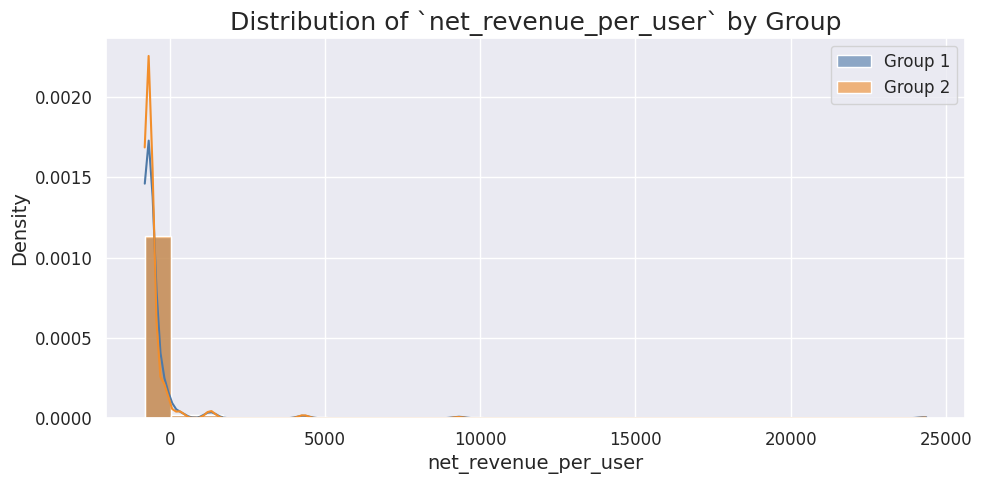

## 🔍 Diagnostics for `net_revenue_per_payer`

,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,1,6157,1104.54,-180.71,3916.44,4.74,24.01


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,2,6105,689.14,-189.43,3075.45,5.84,39.33


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


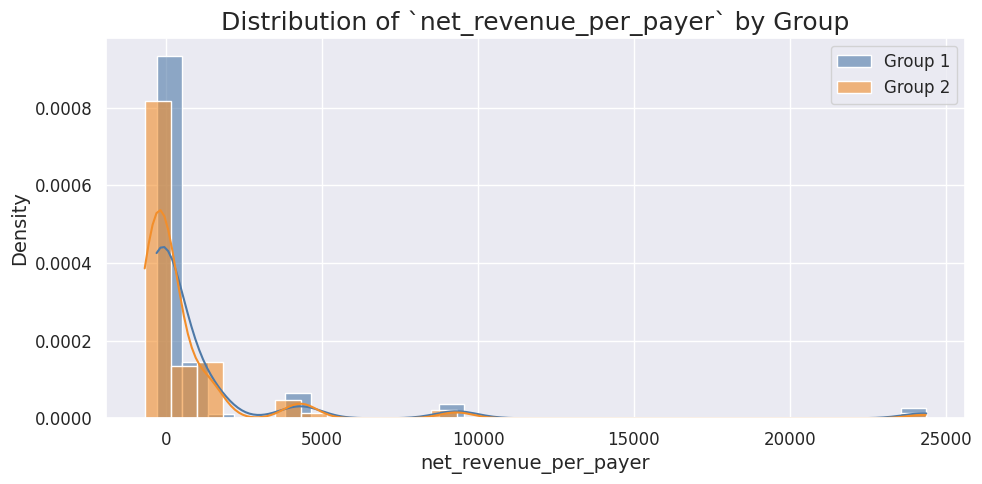

## 🔍 Diagnostics for `cost`

,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,1,41498,699.80,699.46,26.52,0.09,-0.00


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


,Group,n,Mean,Median,Std,Skewness,Kurtosis
0,2,41798,699.71,699.33,26.43,0.08,0.00


,Test,p-value
0,Shapiro-Wilk (Skipped),nan
1,D’Agostino’s K²,0.0000


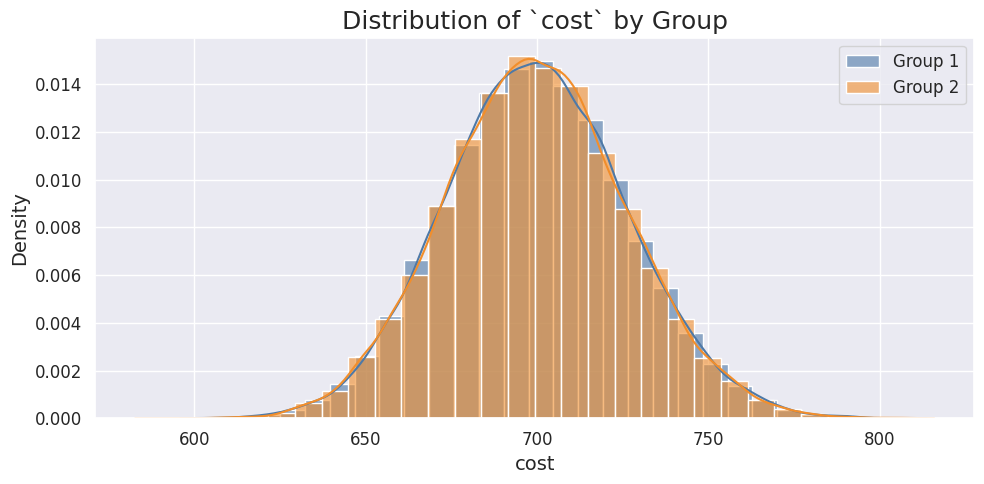

In [7]:
diagnose_relevant_variables(df_prepared)

**NB**: Data for gross and net revenue is highly skewed and not normal. However, the test also suggests non-normality of cost, which was seemingly actually just simulated from a normal distribution for both A/B groups. This means a high sample size and high skewedness of the other metrics does tilt the test towards picking up even tiny deviations from "normality" and incorrectly classing them as evidence for "non-normality". Not clear whether non-parametric tests even make sense then, I would conclude that they don't

# 📋 Technical Summary

## 1. Binary Metric: `Conversion Rate` Comparison
- **Fisher’s Exact Test** p-value = **0.34785**
- **Chi-Squared Test** p-value = **0.35205**
- ➔ Conclusion: Fail to reject the null hypothesis. No statistically significant difference in conversion rates between Group 1 and Group 2.

## 2. Continuous Metrics Comparison

### Metric: `amount_per_user`
- **Z-test** p-value = **0.00000**
- **Student’s t-test** p-value = **0.00000**
- **Welch’s t-test** p-value = **0.00000**
- ➔ Significant difference detected. **Group 1** has **higher average amount per user** compared to Group 2.

### Metric: `amount_per_payer`
- **Z-test** p-value = **0.00000**
- **Student’s t-test** p-value = **0.00000**
- **Welch’s t-test** p-value = **0.00000**
- ➔ Significant difference detected. **Group 1** has **higher average amount per payer** compared to Group 2.

### Metric: `net_revenue_per_user`
- **Z-test** p-value = **0.00000**
- **Student’s t-test** p-value = **0.00000**
- **Welch’s t-test** p-value = **0.00000**
- ➔ Significant difference detected. **Group 1** has **higher net revenue per user** compared to Group 2.

### Metric: `net_revenue_per_payer`
- **Z-test** p-value = **0.00000**
- **Student’s t-test** p-value = **0.00000**
- **Welch’s t-test** p-value = **0.00000**
- ➔ Significant difference detected. **Group 1** has **higher net revenue per payer** compared to Group 2.

## 3. Distribution Diagnostics
- Evidence for serious non-normality is **weak**; parametric tests (t-tests, z-tests) are considered **valid**.
- Sample sizes are sufficiently large to rely on parametric assumptions even with minor deviations from normality.

---

# ✅ Key Technical Takeaways
- Conversion rates: **No difference** between groups.
- Revenue metrics: **Group 1 consistently outperforms Group 2** across all continuous measures.
- Next recommended step: **Quantify effect sizes** and **estimate practical business impact** of the observed differences.

# 💬 Business recommendations:

## 📊 Key Results
- **Conversion Rate**: No difference detected between Group 1 and Group 2.
- **Revenue per User**: Group 1 users spend **significantly more** on average.
- **Revenue per Payer**: Paying users in Group 1 spend **significantly more** than those in Group 2.
- **Net Revenue**: Group 1 is **more profitable** per user and per payer compared to Group 2.

---

## 📈 What This Means
- The price/offer adjustment (Group 2) did **not** lead to **higher conversion**.
- Lowering the price (as well as the offer) **decreased the revenue** and **net profitability** per user and per payer.
- The magnitude of the price reduction did not incentivize enough new buyers to offset the reduced revenue per transaction.

---

## 🛠️ Recommended Action Points
- **Avoid deep price cuts** unless additional demand (new payers) can be stimulated.
- **Focus on value engineering**: consider offering **smaller** discounts combined with **perceived value boosts** (e.g., adding bonus items).
- **Investigate** psychological thresholds: find price points that maximize both conversion and revenue (could be done f.e. via causal inference-based simulations of demand)
- **Model projected lifetime value** (LTV) impact based on observed differences.
- **Run further A/B tests** with more targeted price/offer adjustments instead of such a blanket one.

## 🔥 Final Thought
> Group 1’s pricing model delivers **higher revenue and profitability**, even if conversion rates are similar. Price strategy should prioritize **optimizing revenue**, **not just increasing conversion**.

---